<a href="https://colab.research.google.com/github/divyansh-ag-03/AAIES/blob/main/Assignment12_DQM_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perform Data Quality Checks and various Profiling Functions over the UCI Adult Dataset.

Link for the Dataset:

http://archive.ics.uci.edu/dataset/2/adult


## The Code

#Divyansh Agrawal - 21CSU214

### Imports

In [ ]:
!pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset into a DataFrame

In [ ]:
# Load the dataset into a DataFrame
def load_dataset():
    # TODO: Load the dataset from using ucimlrepo module as provided in the dataset link
    # Define the dataset as a Pandas DataFrame
    # fetch dataset
    adult = fetch_ucirepo(id=2)

    # data (as pandas dataframes)
    X = adult.data.features
    y = adult.data.targets

    df = pd.concat([X, y], axis=1)
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of targets: {y.shape[0]}")

    return df

### Function for applying DQM Checks

In [ ]:
def data_quality_checks(df):
    # Handling missing values
    print("Handling missing values:")
    print(df.isnull().sum())

    # Check for duplicates
    print("\nCheck for duplicates:")
    print(df.duplicated().sum())

    # Check for unique values in categorical columns
    print("\nCheck for unique values in categorical columns:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        print(f"{column}: {df[column].nunique()} unique values")

    # Check for outliers using z-score (considering numerical columns)
    print("\nCheck for outliers using z-score:")
    from scipy.stats import zscore
    z_scores = zscore(df.select_dtypes(include=['number']))
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > 3).all(axis=1)
    print(f"Number of rows with outliers: {outliers.sum()}")

### Applying profiling

In [ ]:
def profiling_visualization(df):
    # Display basic information about the dataset
    print("Basic information about the dataset:")
    print(df.info())

    # Descriptive statistics
    print("\nDescriptive statistics:")
    print(df.describe())

    # Categorical feature profiling
    print("\nCategorical feature profiling:")
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        print(f"\n{column}:\n{df[column].value_counts()}")

    # Numerical feature profiling
    print("\nNumerical feature profiling:")
    numerical_columns = df.select_dtypes(include=['number']).columns
    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'{column} Distribution')
        plt.show()

### Main function to display recommendation

Number of features: 14
Number of targets: 48842
Handling missing values:
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Check for duplicates:
29

Check for unique values in categorical columns:
workclass: 9 unique values
education: 16 unique values
marital-status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native-country: 42 unique values
income: 4 unique values

Check for outliers using z-score:
Number of rows with outliers: 0
Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  -

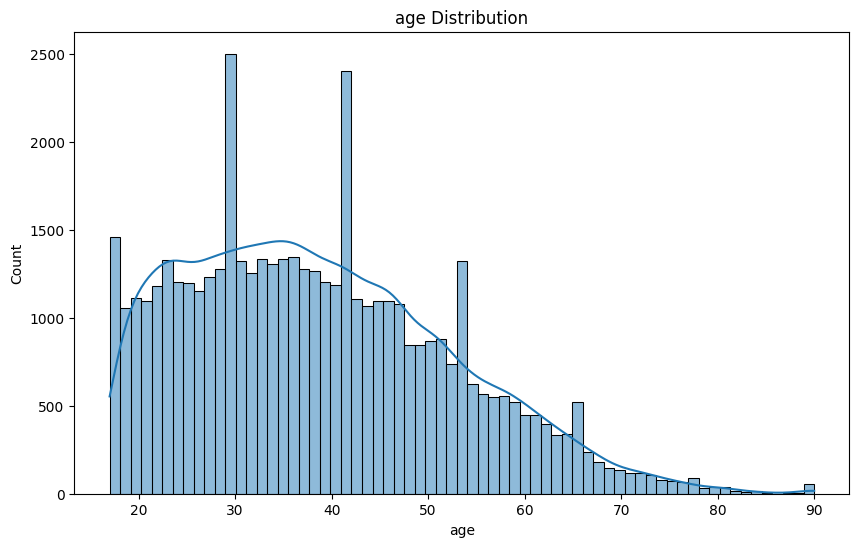

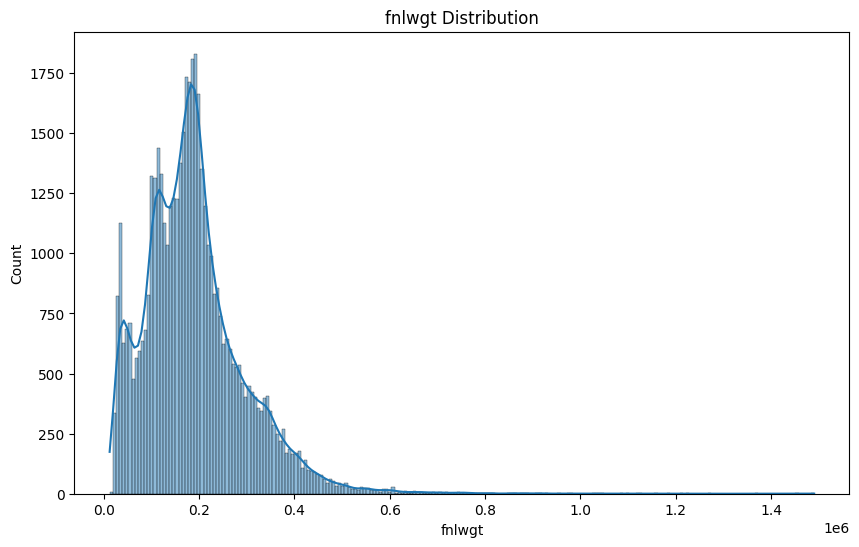

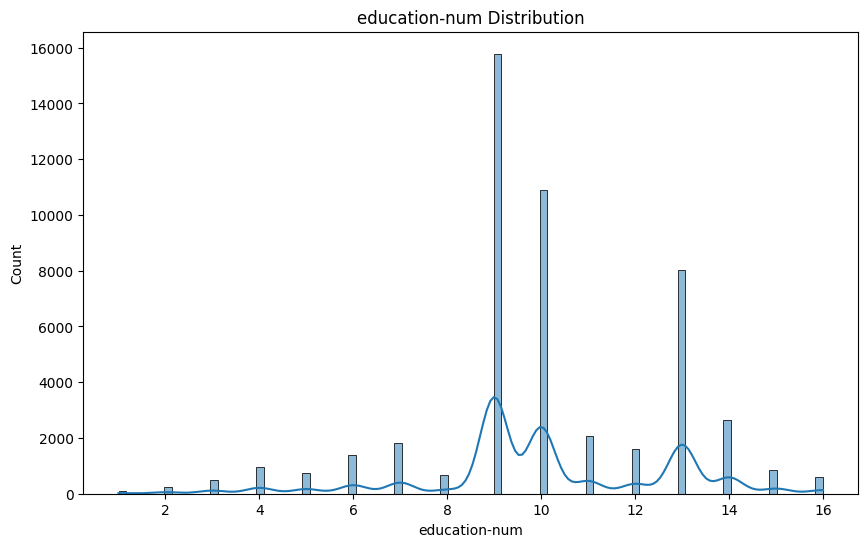

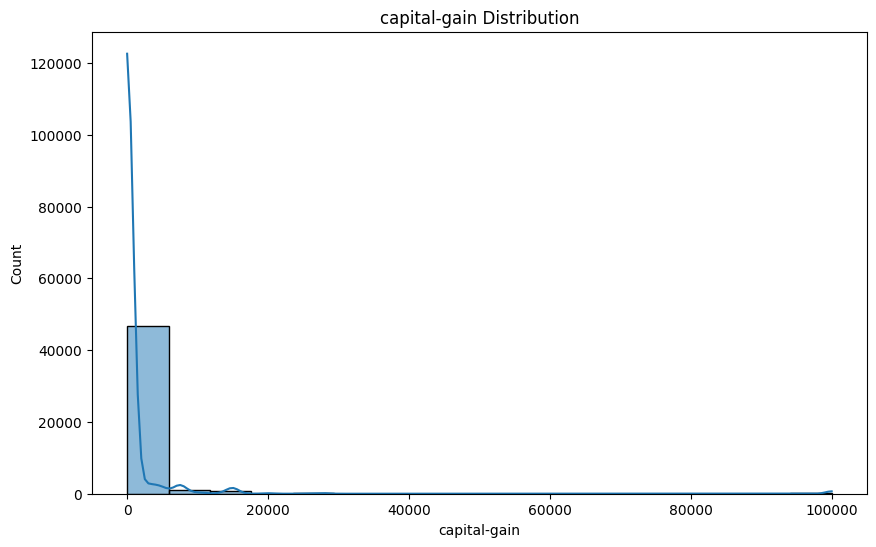

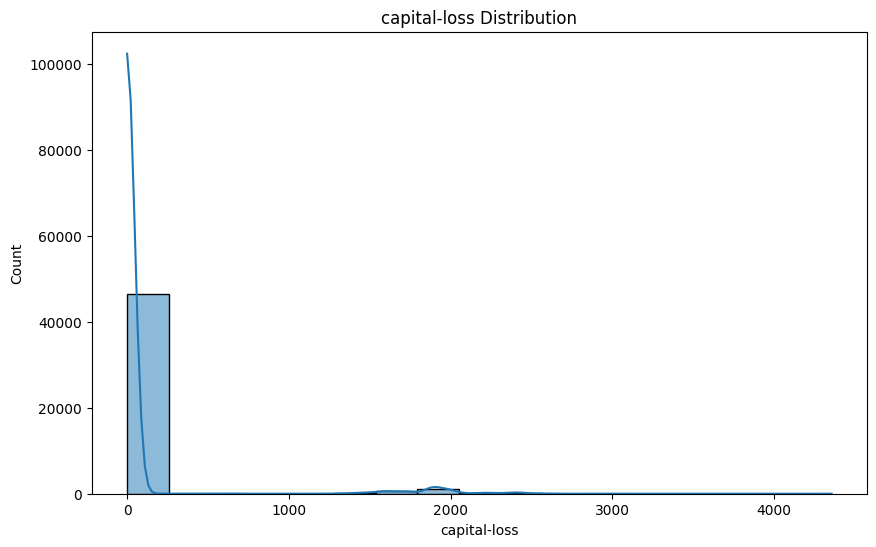

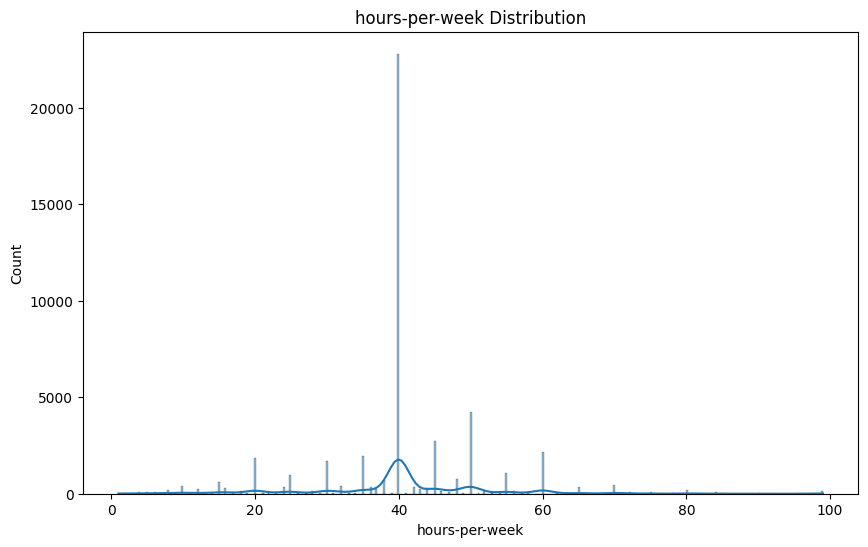

In [ ]:
# Load the dataset
df = load_dataset()

# Data quality checks
data_quality_checks(df)

# Profiling and visualization
profiling_visualization(df)